

# Data Preprocessing



In [47]:
import pandas as pd                                     #For data preprocessing
import matplotlib.pyplot as plt                         #For data viz
import seaborn as sns                                   #For data viz
import numpy as np                                      #For maths elements

from sklearn.model_selection import train_test_split    #For splitting dataset
from sklearn.linear_model import LogisticRegression     #For logistic regression model creation
from sklearn import metrics                             #For calculating model metrics
from sklearn.metrics import classification_report       #For the classification report
from sklearn.metrics import roc_auc_score               #For calculating the ROC/AUC score

In [2]:
#**************Data preprocessing***************

df=pd.read_csv("titanic-passengers.csv", sep=";", quotechar='"')   # import titanic dataset
df.head()        #First 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.tail()    #show last 5 rows
#our data set includes 891 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [4]:
df.info()     #General information about the dataset
#We have both numerical(int64 and float64) and categorical(object) variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.loc[:,["PassengerId","Pclass","SibSp","Parch"]].describe()      #Describe int type columns

,PassengerId,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.523008,0.381594
std,257.353842,0.836071,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000
50%,446.000000,3.000000,0.000000,0.000000
75%,668.500000,3.000000,1.000000,0.000000
max,891.000000,3.000000,8.000000,6.000000


In [6]:
df.loc[:,["Age","Fare"]].describe()      #describe float64 type columns

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [7]:
df.loc[:,["Name","Sex","Ticket","Cabin","Embarked"]].describe()     #describe object type columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Parkes, Mr. Francis ""Frank""",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
 df["Survived"].describe()        #Describe the output: Survived

count     891
unique      2
top        No
freq      549
Name: Survived, dtype: object

In [9]:
df.isnull().sum()
#Age numerical variable contains 177 NaN values
#Cabin categorical variable contains 687 NaN values
#Embarked categorical variable contains 2 NaN values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
 df.dropna(axis=1,thresh=500,inplace=True)        #delete columns with more than 500 NaN

In [11]:
df["Age"].fillna(df["Age"].mean(), inplace=True)  #replace NaN in variable Age with the mean

In [12]:
df["Embarked"].fillna("S", inplace=True)          #replace NaN in variable Embarked with most frequent value "S"

In [13]:
df.isnull().sum().sum()                           # verify there's no more NaN values

0

# Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fa204314588>,
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

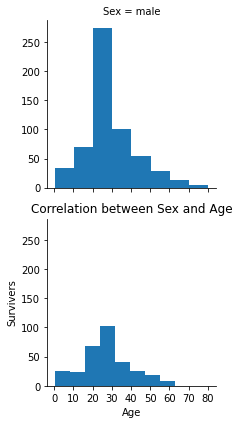

In [14]:
#*************Data visualization******************

#the correlation between Sex and Age

fig1=plt.figure()
g=sns.FacetGrid(df,"Sex")
g.map(plt.hist,"Age",bins=8)
plt.title("Correlation between Sex and Age")
plt.ylabel("Survivers")
plt.xticks([i*10 for i in range(0,9)])


Text(0.5, 1.0, 'Correlation between Pclass and Fare')

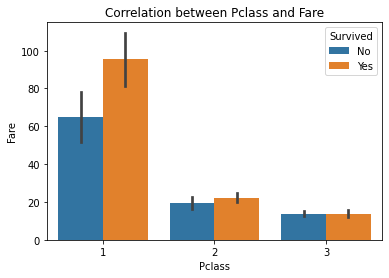

In [15]:
#Correlation between Pclass and Fare

fig2=plt.figure()
ax=sns.barplot(x=df['Pclass'],y=df['Fare'],hue=df['Survived'])
plt.title("Correlation between Pclass and Fare")

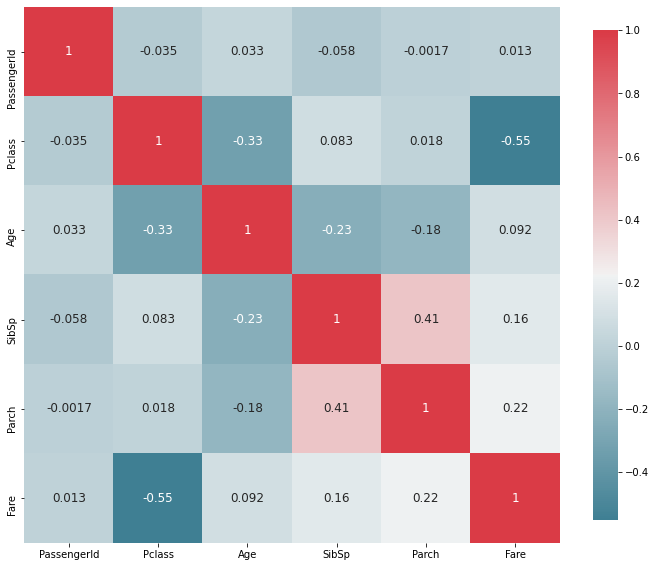

In [16]:
def plot_correlation_map( df ):
  corr = df.corr()
  s , ax = plt.subplots( figsize =( 12 , 10 ) )
  cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
  s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
    
plot_correlation_map( df )

EXPLANATION OF THE HEATMAP after running the function, we can see that the output represents a color-encoded matrix. in the color code bar,the blue part represents the negative correlations and the darker the blue the stronger the positive correlation. then the middle section where the colors are a little light or almost grey where we can not conclude on wether we have a correlation or not . and the red represents the positive correlation and the darker the red the stronger the positive correlation gets. for example if we want to know the correlation between Sibsp and Parch, we can see that there's a slight correlation of 0.41. we can also see diagnollay,that there's a complete correlation between the elements that are the same. if we look for very strong correlations,we don't find any positive ones but on the other hand we can see a very strong negative correlation between Pclass and Fare and that means as the Fare goes up , the Pclass goes down. if we compare the heatmap to a scatter platform based on the same dataset using seaborn pairplot,we notice that they match as far as correlation goes. if we look at Sibpsp and Parch , we can see that there's a fairly slight correlation going up, we'd expect that to be a slight red in the heatmap which is the case. and we get pretty much the same thing if we look at the correlation between Fare and Pclass, a strongly negative one going down and a dark blue code on the heatmap.

In [17]:
#The relation between Pclass and survived 
df[['Pclass','Survived']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [18]:
df["Title"]=df["Name"]                  #create a new feature called "Title"
df.drop(columns="Name", inplace=True)   #drop "Name" feature

In [19]:
title=[]
for t in df["Title"]:
  t=t.split(",")
  t=t[1].split(".")
  title.append(t[0])
df["Title"]=title

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr


Text(0, 0.5, 'Survivers')

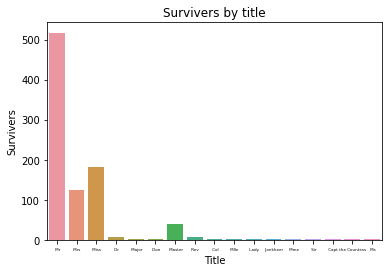

In [21]:
#Correlation between Title and other features

fig3=plt.figure()
sns.countplot(x="Title", data=df)
plt.title("Survivers by title")
plt.xticks(fontsize=4)
plt.ylabel("Survivers")

([<matplotlib.axis.XTick at 0x7fa200d895c0>,
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

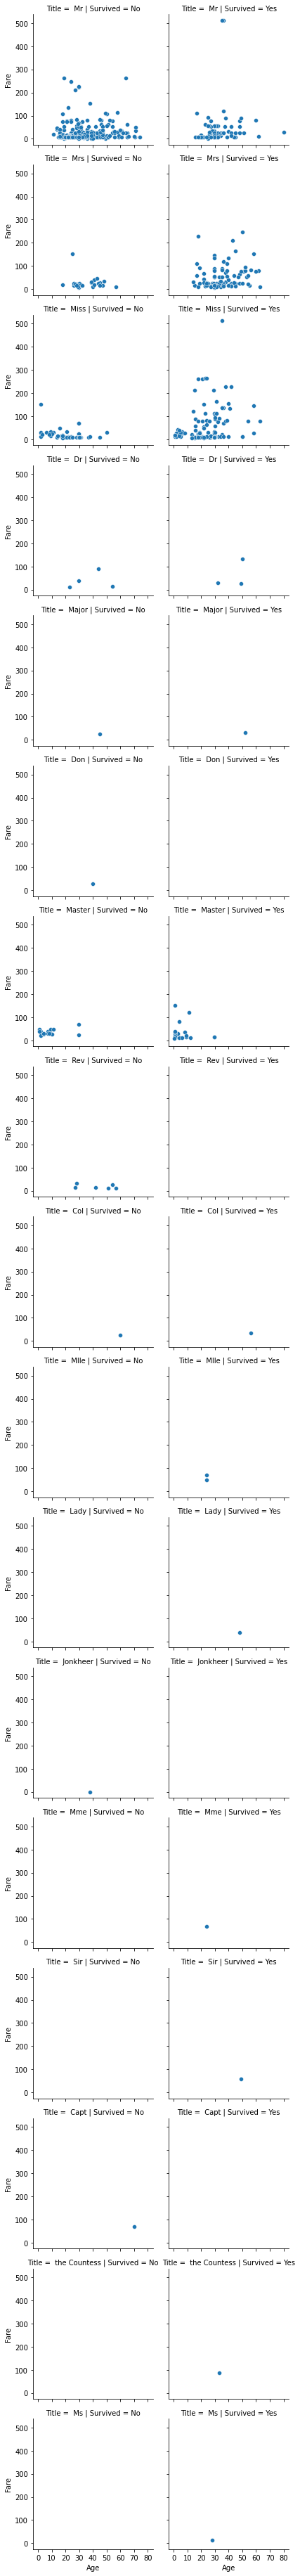

In [22]:
fig4=plt.figure()
g2=sns.FacetGrid(df, row="Title", col="Survived")
g2.map(sns.scatterplot, "Age", "Fare")
plt.xticks([i*10 for i in range(0,9)])


In [23]:
# group these titles into more useful ones

print(df["Title"].value_counts())

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }
print(df.isnull().sum())

df["Title"]=df["Title"].str.strip()
df["Title"] = df["Title"].map(Title_Dictionary)


 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Lady              1
 Capt              1
 Ms                1
 Sir               1
 the Countess      1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


In [24]:
df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

Text(0, 0.5, 'Survivers')

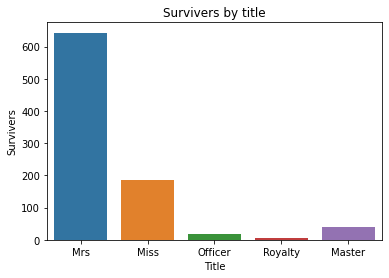

In [25]:
#New correlation between Title and other features

fig5=plt.figure()
sns.countplot(x="Title", data=df)
plt.title("Survivers by title")
plt.ylabel("Survivers")

([<matplotlib.axis.XTick at 0x7fa1fedb0cc0>,
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

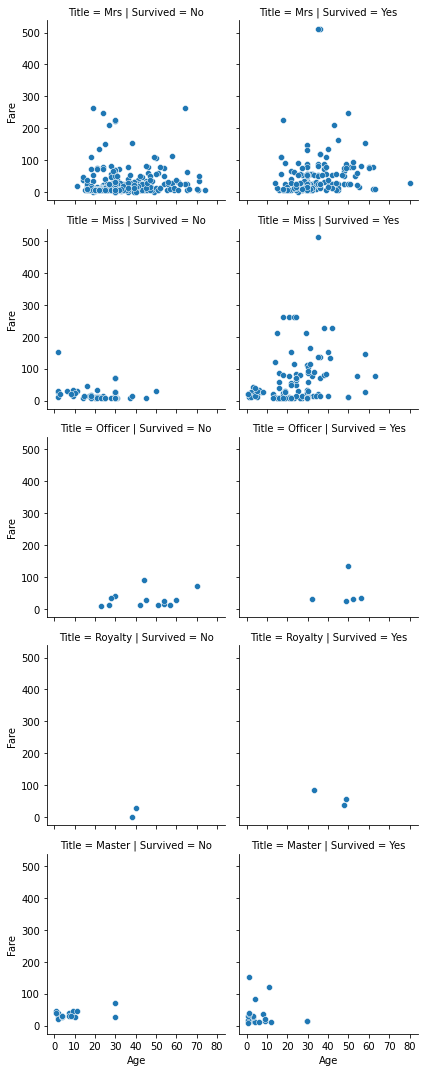

In [26]:
#Correlation between "Title", "Age", "Fare" and "Survived"

fig6=plt.figure()
g3=sns.FacetGrid(df, row="Title", col="Survived")
g3.map(sns.scatterplot, "Age", "Fare")
plt.xticks([i*10 for i in range(0,9)])

In [27]:
df["FamilySize"]=df["Parch"]+df["SibSp"]    #create FamilySize new feature
df.drop(['Parch'],axis=1)
df.drop(['SibSp'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,S,Mrs,0
1,76,No,3,male,25.0,0,0,348123,7.6500,S,Mrs,0
2,641,No,3,male,20.0,0,0,350050,7.8542,S,Mrs,0
3,568,No,3,female,29.0,0,4,349909,21.0750,S,Mrs,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,1


In [28]:
#Is it useful?

s=df["FamilySize"]
s=pd.core.frame.DataFrame(s)
s["Sur"]=df["Survived"]
a=0
b=0
l1=[0 for i in range(df["FamilySize"].max()+1)]
while b<len(s):
  if s.iloc[b,1]=="Yes":
    while a<(df["FamilySize"].max()+1):
      if s.iloc[b,0]==a:
        l1[a]+=1
      a+=1
  b+=1
  a=0

s1=s["FamilySize"].value_counts()
l2=[]
d=0
while d<(df["FamilySize"].max()+1):
  try:
    l2.insert(d,s1[d])
  except:
    l2.insert(d,0)
  d+=1
l2=[l2[nb]-l1[nb] for nb in range(df["FamilySize"].max()+1)]

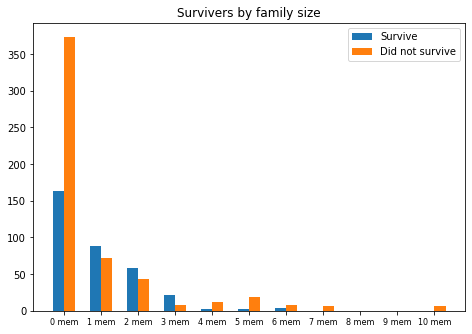

In [29]:
labels=[(str(i)+" mem") for i in range(df["FamilySize"].min(),df["FamilySize"].max()+1)]

x=np.arange(len(labels))
fig7=plt.figure()
ax2=fig7.add_axes([0,0,1,1])
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
plt.xticks(fontsize=8)
plt.title("Survivers by family size")
ax2.bar(x-0.15,l1,width=0.30)
ax2.bar(x+0.15,l2,width=0.30)
ax2.legend(["Survive","Did not survive"])

# Features transformation

In [30]:
#**************Features transformation*******************

clean_survived={
    "Survived":{"No":0, "Yes":1}
}
df.replace(clean_survived, inplace=True)

clean_sex={
    "Sex":{"male":1, "female":2}
}
df.replace(clean_sex, inplace=True)

one_hot_title=pd.get_dummies(df["Title"])
df=df.drop(columns="Title")
df=df.join(one_hot_title)

one_hot_embarked=pd.get_dummies(df["Embarked"])
df=df.drop(columns="Embarked")
df=df.join(one_hot_embarked)

df.info()
#There's not object type values, except the Ticket variable, which is useless in our case.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   FamilySize   891 non-null    int64  
 10  Master       891 non-null    uint8  
 11  Miss         891 non-null    uint8  
 12  Mrs          891 non-null    uint8  
 13  Officer      891 non-null    uint8  
 14  Royalty      891 non-null    uint8  
 15  C            891 non-null    uint8  
 16  Q            891 non-null    uint8  
 17  S            891 non-null    uint8  
dtypes: float64(2), int64(7), object(1), uint8(8)
memor

# Machine Learning

In [35]:
#*************Logistic regression**************

#Features extraction

x=df[[elt for elt in df.columns if elt not in ["PassengerId","Survived","SibSp","Parch","Ticket"]]]
y=df["Survived"]

In [38]:
#Dataset splitting

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)  #Splitting data with test part is 30%

In [41]:
# Model creation

logreg=LogisticRegression() 
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test) 

print("Accuracy: {acc}%".format(acc=logreg.score(x_test, y_test)*100))

Accuracy: 84.70149253731343%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


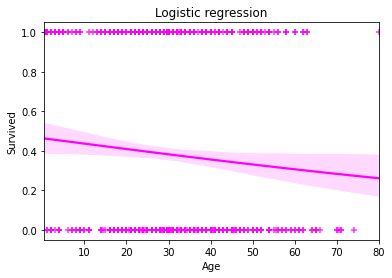

In [56]:
#Model plotting

fig8=plt.figure()
plt.title("Logistic regression")
sns.regplot("Age", "Survived", data=df, logistic=True, marker="+", color="magenta" )

In [45]:
# Confusion matrix

confusion_matrix=pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
print(confusion_matrix)

Predicted    0   1
Actual            
0          141  21
1           20  86


In [43]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       162
           1       0.80      0.81      0.81       106

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



In [50]:
#ROC/AUC validation matrix
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
#*AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
#*ROC is a probability curve and AUC represents degree or measure of separability.
#*It tells how much model is capable of distinguishing between classes. 
#*Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.


print("ROC/AUC score: {sc}".format(sc=roc_auc_score(y_test, y_pred)))

ROC/AUC score: 0.8408455625436757
